In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = {}

for k in ["vanilla", "vanilla_restricted", "mobi", "mobi_restricted"]:
    with open(f"results_{k}/metrics_details.json") as f:
        results[k] = json.load(f)

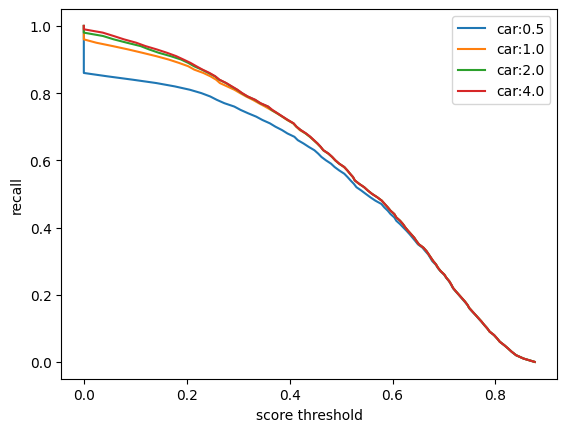

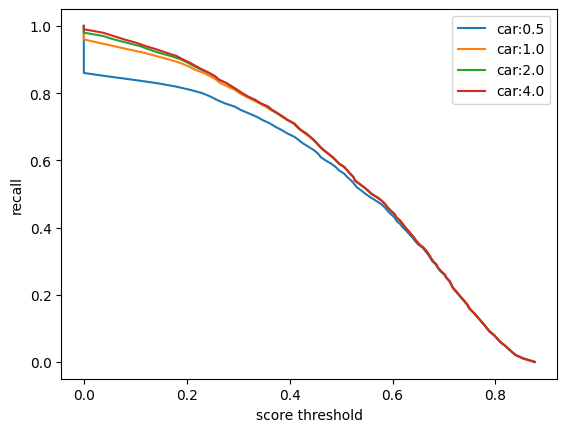

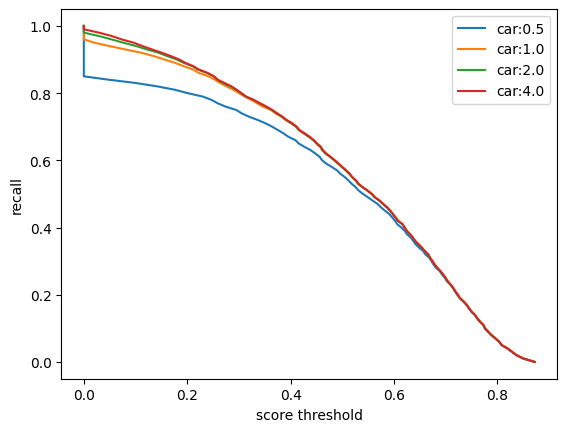

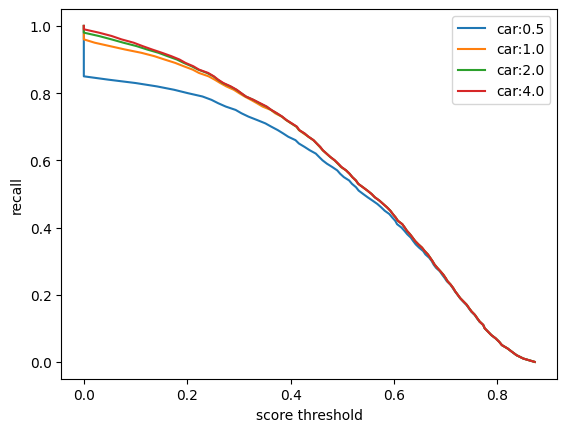

In [3]:
for k in results:
    data = results[k]

    keys = ["car:0.5", "car:1.0", "car:2.0", "car:4.0"]
    for k, d in ((key, data[key]) for key in keys):
        plt.plot(d["confidence"], d["recall"], label=k)
    plt.ylabel('recall')
    plt.xlabel('score threshold')
    plt.legend()
    plt.show()

Text(0.5, 0, 'score threshold')

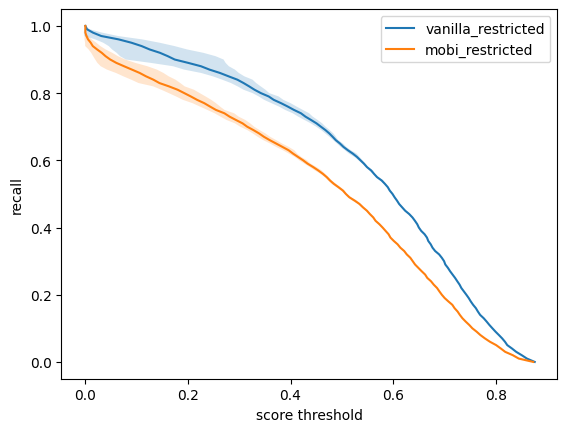

In [18]:
for k in ["vanilla_restricted", "mobi_restricted"]:  # results:
    data = results[k]

    # Compute the mean and std of the confidence for each recall value over keys
    mean = np.stack([data[key]["confidence"] for key in keys]).mean(axis=0)
    std = np.stack([data[key]["confidence"] for key in keys]).std(axis=0)

    # Plot the mean and std as a shaded area
    plt.fill_betweenx(data[keys[0]]["recall"], mean - std, mean + std, alpha=0.2)
    plt.plot(mean, data[keys[0]]["recall"], label=k)

plt.legend()
plt.ylabel('recall')
plt.xlabel('score threshold')

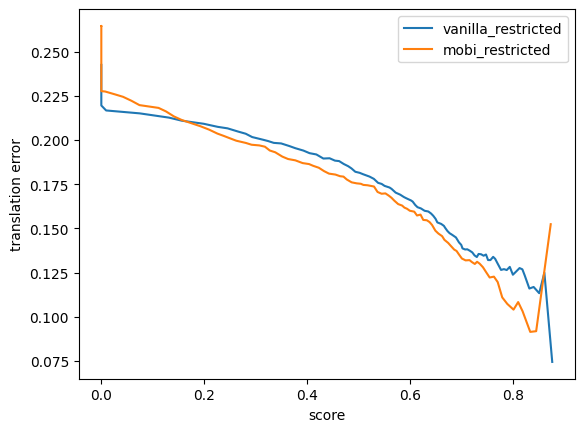

In [28]:
for k in ["vanilla_restricted", "mobi_restricted"]:
    data = results[k]
    plt.plot(data[keys[0]]["confidence"], data["car:2.0"]["trans_err"], label=k)

plt.ylabel('translation error')
plt.xlabel('score')
plt.legend()

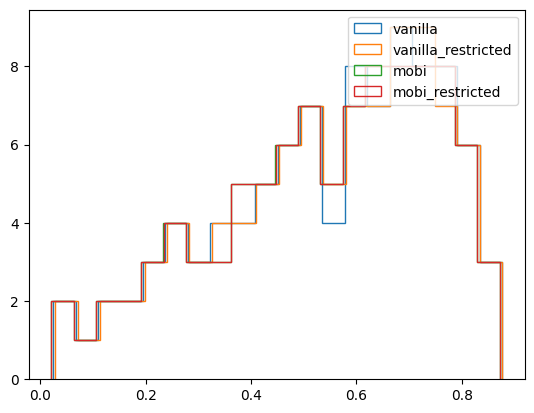

In [20]:
for k, data in results.items():
    # Just use a single line for the confidence histogram
    confidence = [c for c in data["car:1.0"]["confidence"] if c > 0]
    plt.hist(confidence, bins=20, histtype='step', label=k)
plt.legend()